# Model selection - PCA version

In [1]:
# import some libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold

# Loading data

In [2]:
#load training and testing data

raw_train = pd.read_csv("uc_data_train.csv", encoding='UTF-8')
raw_train = raw_train.loc[:, ~raw_train.columns.str.contains('Unnamed')]
raw_test = pd.read_csv("uc_data_test.csv", encoding='UTF-8')
raw_test = raw_test.loc[:, ~raw_test.columns.str.contains('Unnamed')]

#check the number of customer and features
print(raw_train.shape)
print(raw_test.shape)

(80001, 14)
(19999, 13)


In [3]:
#print top 5 from raw_train data
print(raw_train.head())

   customer_id  size_womenswear  total_number_of_orders  return_rate  \
0            1               16                      28         0.12   
1            2               20                     118         0.61   
2            3                8                     125         0.04   
3            4               12                     109         0.42   
4            5               16                      37         0.26   

   first_order_channel socioeconomic_status  size_corsetry_cup  \
0                    1                    C                  7   
1                    2                    H                  3   
2                    2                    F                  3   
3                    1                    F                  5   
4                    1                    I                  4   

   size_corsetry_briefs  size_footware  days_since_first_order    brand  \
0                    16              7                    4964  Brand 1   
1                   

# Feature extraction

In [4]:
#select some columns as features
features = ['total_number_of_orders', 'return_rate', 'socioeconomic_desc',
           'size_corsetry_cup', 'size_corsetry_briefs', 'size_footware', 'days_since_first_order', 
            'brand', 'age_in_years']
categorical = ['socioeconomic_desc', 'brand']

#divide dataset into data and label
#training data
train_data = raw_train[features]
train_data[categorical] = train_data[categorical].apply(LabelEncoder().fit_transform)
print(train_data.head())
train_label = raw_train.loc[:, ['size_womenswear']].values.ravel()
print(train_data.shape)
print(train_label.shape)

#testing data
test_data = raw_test[features]
test_data[categorical] = test_data[categorical].apply(LabelEncoder().fit_transform)
print(test_data.shape)

C:\Users\user\AppData\Roaming\Python\Python35\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


   total_number_of_orders  return_rate  socioeconomic_desc  size_corsetry_cup  \
0                      28         0.12                   2                  7   
1                     118         0.61                   0                  3   
2                     125         0.04                  11                  3   
3                     109         0.42                  11                  5   
4                      37         0.26                   4                  4   

   size_corsetry_briefs  size_footware  days_since_first_order  brand  \
0                    16              7                    4964      0   
1                    20              6                    5578      3   
2                    12              4                    4112      3   
3                    12              7                    4261      0   
4                    16              6                    2432      3   

   age_in_years  
0            47  
1            73  
2            65  
3 

In [5]:
#scale all the features
train_data = StandardScaler().fit_transform(train_data.values)
test_data = StandardScaler().fit_transform(test_data.values)
print(train_data)
print(test_data)

[[-0.50484342 -0.64757463 -1.13826267 ...  0.66322409 -1.2810438
  -0.6030384 ]
 [ 0.90371579  1.74448391 -1.57639324 ...  0.88491704  1.04054036
   1.09127697]
 [ 1.0132704  -1.0381148   0.83332487 ...  0.35559803  1.04054036
   0.56994916]
 ...
 [ 0.95066777  0.03587067 -0.48106682 ...  2.47576256 -1.2810438
   0.37445123]
 [-0.67700065 -1.08693232 -0.48106682 ... -0.55825354  1.04054036
   1.22160892]
 [ 1.68624869  0.23114075  0.39519431 ...  1.40809797  1.04054036
   0.56994916]]
[[-0.67141597  0.04384049 -0.4680673  ... -0.54590329  0.26293169
  -0.85630257]
 [-0.46835324  1.31828084  1.72171419 ... -0.47109087  1.03838823
  -0.59665288]
 [-0.79637765  0.28892517 -0.68704545 ... -1.06019354  0.26293169
   0.2472086 ]
 ...
 [-0.51521387 -1.08354905 -1.56295804 ... -0.74468027  1.03838823
  -1.37560194]
 [-0.53083408 -1.13256599 -0.24908915 ... -0.72480257  0.26293169
  -1.50542679]
 [-0.65579576 -0.93649824 -0.24908915 ... -0.81443291  0.26293169
  -1.95981374]]


[24.04 39.19 51.45 62.32 73.02 82.67 90.52 97.13 99.99]


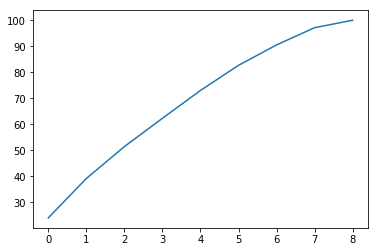

[ 24.07  39.35  51.52  62.46  73.18  82.74  90.63  97.11 100.  ]


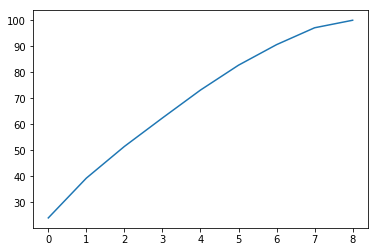

In [6]:
#find a optimum number of components on PCA
cumulative = np.cumsum(np.round(PCA(n_components=9).fit(train_data).explained_variance_ratio_, decimals=4)*100)
print(cumulative)
plt.plot(cumulative)
plt.show()

tcumulative = np.cumsum(np.round(PCA(n_components=9).fit(test_data).explained_variance_ratio_, decimals=4)*100)
print(tcumulative)
plt.plot(tcumulative)
plt.show()

#the optimal number of PCA component is 8

In [7]:
pca_numbers = ['PCA_%d' %x for x in range(0,8)]

#
pca_train = PCA(n_components=8).fit_transform(train_data)
pca_test = PCA(n_components=8).fit_transform(train_data)

#
reduced_train = pd.DataFrame(data = pca_train,
                            columns = pca_numbers)
reduced_train = pd.concat([reduced_train, raw_train[['size_womenswear']]], axis=1)
reduced_train.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,size_womenswear
0,-0.610434,0.234831,-0.491216,-1.608213,0.543180,-1.238268,-1.308075,-0.129183,16
1,1.839062,0.287185,-1.671057,-0.377940,-1.290708,0.763704,1.031576,-0.644973,20
2,0.969589,-1.796170,-0.286845,1.996342,-0.571442,-0.930243,-0.194095,0.174306,8
3,1.350665,-0.866856,0.185028,-0.567755,1.064230,0.617613,-1.397117,-0.409386,12
4,-0.328307,-0.441956,-0.808910,0.385017,-0.763382,0.001288,0.281197,-0.811777,16


In [10]:
#fit into classifier
models  =  []
models.append(('RF', RF()))
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial')))
models.append(('GradientBoost', GradientBoostingClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('MLP', MLPClassifier()))
    
scoring = 'f1_micro'
results = []
names = []

print("f1 micro on training data with Cross-validation:")
for name, model in models:

    #split training data into 10 fold, and calculate the score by accuracy 
    cv_results = model_selection.cross_val_score(model, pca_train, train_label, cv = KFold(n_splits=10, 
                random_state = None), scoring = 'f1_micro')
    results.append(cv_results)
    names.append(name)

    #print the result, its mean and standard deviation
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


f1 micro on training data with Cross-validation:
RF: 0.613 (0.003)
LR: 0.635 (0.002)


KeyboardInterrupt: 